In [55]:
import pandas as pd
pd.options.display.max_columns = None
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [56]:
df_prof = pd.read_csv("../Archivos/profesionales_nonull.csv", index_col= 0)

In [57]:
df_noprof = pd.read_csv("../Archivos/no_profesionales.csv", index_col= 0)

In [58]:
columnas_b = df_noprof.columns[-7:].tolist()

In [59]:
columnas_b

['q29b_productos_familiar_cloud_computing',
 'q31b_productos_familiar_ml',
 'q32b_productos_familiar_bd',
 'q34b_herramientas_familiar_bi',
 'q36b_cat_herramientas_familiar_ml',
 'q37b_cat_herramientas_familiar_ml_aut',
 'q38b_herramientas_familiar_gest_exp_ml']

In [60]:
for i in columnas_b:
    print(i, "-->", df_noprof[i].isnull().sum()*100/df_noprof.shape[0])

q29b_productos_familiar_cloud_computing --> 35.02844141069397
q31b_productos_familiar_ml --> 21.205915813424348
q32b_productos_familiar_bd --> 25.494880546075084
q34b_herramientas_familiar_bi --> 29.158134243458477
q36b_cat_herramientas_familiar_ml --> 33.70875995449374
q37b_cat_herramientas_familiar_ml_aut --> 52.58248009101251
q38b_herramientas_familiar_gest_exp_ml --> 38.532423208191126


In [61]:
def data_pregunta(dataf, colum):
    df = dataf[["genero", "puesto_trabajo", colum]]
    df[colum] = df[colum].str.split(",")
    df = df.explode(colum)
    return df

In [64]:
df_q29b = data_pregunta(df_noprof, 'q29b_productos_familiar_cloud_computing')
df_q31b = data_pregunta(df_noprof, 'q31b_productos_familiar_ml')
df_q32b = data_pregunta(df_noprof, 'q32b_productos_familiar_bd')
df_q34b = data_pregunta(df_noprof, 'q34b_herramientas_familiar_bi')
df_q36b = data_pregunta(df_noprof, 'q36b_cat_herramientas_familiar_ml')
df_q37b = data_pregunta(df_noprof, 'q37b_cat_herramientas_familiar_ml_aut')
df_q38b = data_pregunta(df_noprof, 'q38b_herramientas_familiar_gest_exp_ml')

/tmp/ipykernel_2113/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_2113/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colum] = df[colum].str.split(",")
/tmp/ipykernel_2113/1052660363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [73]:
lista_df = [df_q29b, df_q31b, df_q32b, df_q34b, df_q36b, df_q37b, df_q38b]

In [74]:
dict_df = {columnas_b[i] : u for i, u in enumerate(lista_df)}

In [75]:
dict_df.keys()

dict_keys(['q29b_productos_familiar_cloud_computing', 'q31b_productos_familiar_ml', 'q32b_productos_familiar_bd', 'q34b_herramientas_familiar_bi', 'q36b_cat_herramientas_familiar_ml', 'q37b_cat_herramientas_familiar_ml_aut', 'q38b_herramientas_familiar_gest_exp_ml'])

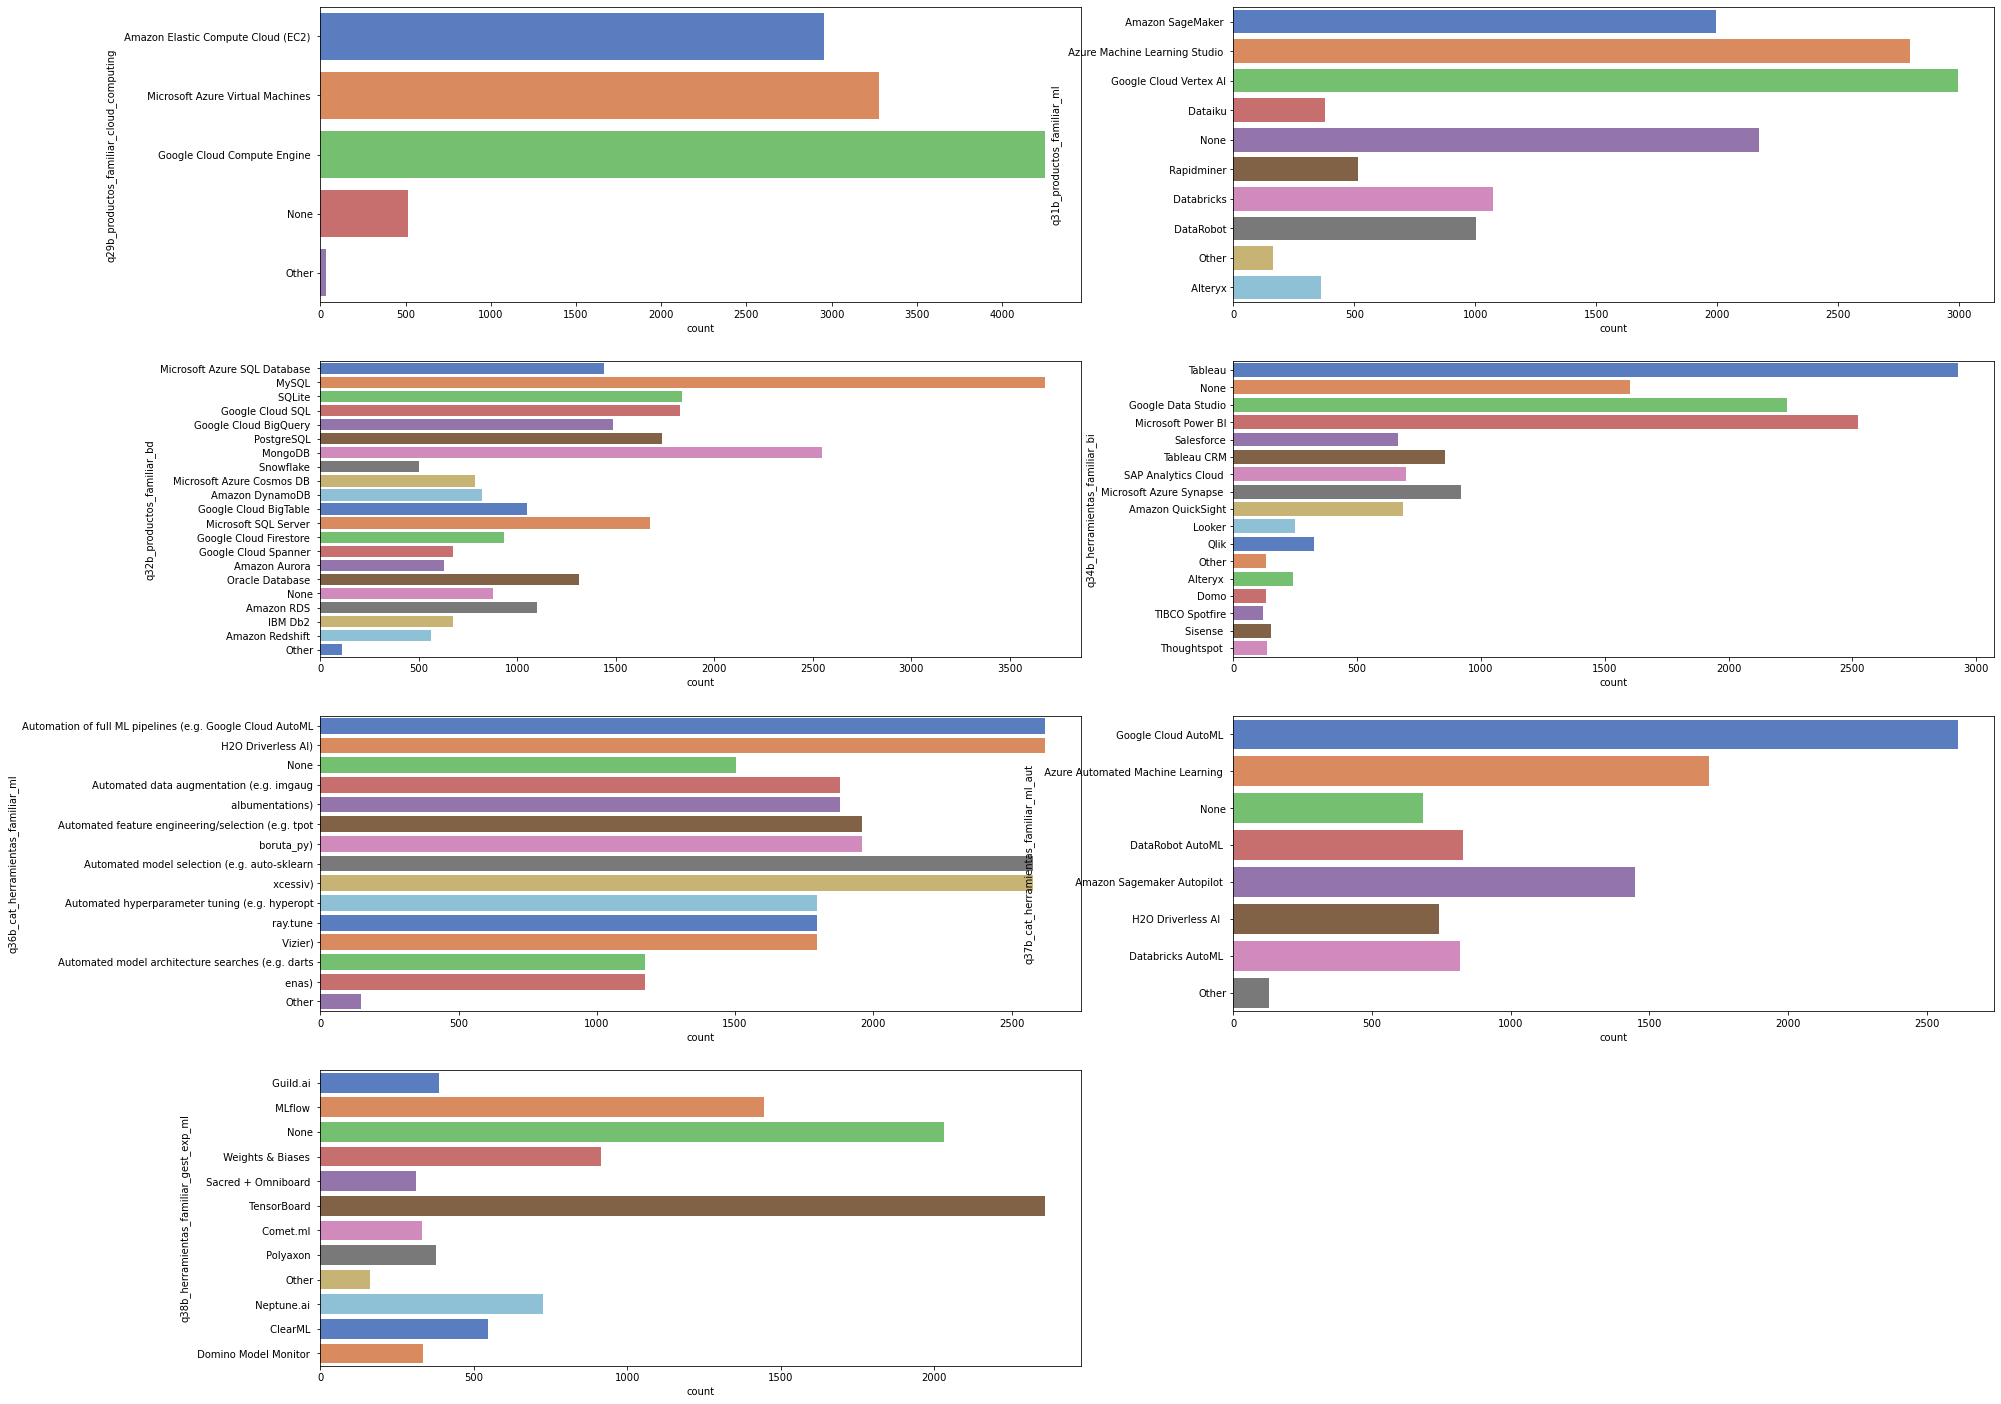

In [78]:
fig, axes = plt.subplots(4,2, figsize= (30,25))
axes = axes.flat
for indice, (k,v) in enumerate(dict_df.items()):
    sns.countplot(data = v, y = k, ax = axes[indice], palette="muted")
    
#axes[3].legend(bbox_to_anchor = (0.4,0.35))
fig.delaxes(axes[-1])
plt.show()